In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('B.csv')
data = df.reset_index()['Close']

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data).reshape(-1, 1))
data = []

for i in data1:
    if ((np.isnan(i)) != True):
        data.append(i)
data=np.array(data).reshape(-1,1)
# data = np.array(data).reshape(-1,1)
# print((data))
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size, :]
test_data = data[train_size:, :]

print(data)
print(train_data)

# c = 0

# print(c)
#     else:
#         print("no")
#     print(type(i))

[[0.07840884]
 [0.07840884]
 [0.07843621]
 ...
 [0.94342309]
 [0.94730792]
 [0.94615891]]
[[0.07840884]
 [0.07840884]
 [0.07843621]
 ...
 [0.75268113]
 [0.75339239]
 [0.74518491]]


In [2]:
# Prepare the data for training
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back)])
        Y.append(data[i+look_back])
    return np.array(X), np.array(Y)

look_back = 100
train_X, train_Y = prepare_data(train_data, look_back)
test_X, test_Y = prepare_data(test_data, look_back)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))



In [3]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Train the modeldwqefqqqqqqq
model.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
40/40 [==============================] - 7s 112ms/step - loss: 0.0193
Epoch 2/100
40/40 [==============================] - 4s 109ms/step - loss: 5.3139e-04
Epoch 3/100
40/40 [==============================] - 4s 109ms/step - loss: 4.0968e-04
Epoch 4/100
40/40 [==============================] - 4s 109ms/step - loss: 3.9219e-04
Epoch 5/100
40/40 [==============================] - 4s 108ms/step - loss: 3.9624e-04
Epoch 6/100
40/40 [==============================] - 4s 102ms/step - loss: 4.0800e-04
Epoch 7/100
40/40 [==============================] - 4s 106ms/step - loss: 3.9615e-04
Epoch 8/100
40/40 [==============================] - 4s 109ms/step - loss: 3.8242e-04
Epoch 9/100
40/40 [==============================] - 4s 112ms/step - loss: 3.6093e-04
Epoch 10/100
40/40 [==============================] - 5s 116ms/step - loss: 3.5211e-04
Epoch 11/100
40/40 [==============================] - 4s 92ms/step - loss: 3.6213e-04
Epoch 12/100
40/40 [==============================] - 5s 

In [5]:
# Evaluate the model
train_score = model.evaluate(train_X, train_Y, verbose=0)
test_score = model.evaluate(test_X, test_Y, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, np.sqrt(train_score)))
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, np.sqrt(test_score)))

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# scaler.scale_
# Inverse the scaling
scale_factor = 1/scaler.scale_
train_predict = scaler.inverse_transform(train_predict)
# train_predict1=train_predict1*scale_factor
train_Y = scaler.inverse_transform(train_Y)
# train_Y=train_Y*scale_factor
test_predict = scaler.inverse_transform(test_predict)
# test_predict1 = test_predict1*scale_factor
test_Y = scaler.inverse_transform(test_Y)
# test_Y = test_Y*scale_factor

print(train_predict)
print(train_Y)

Train Score: 0.00 MSE (0.01 RMSE)
Test Score: 0.00 MSE (0.02 RMSE)
18/18 [==============================] - 1s 37ms/step
[[ 13.817565]
 [ 13.442222]
 [ 13.308303]
 ...
 [142.38704 ]
 [142.01659 ]
 [142.04047 ]]
[[ 13.005   ]
 [ 12.995   ]
 [ 13.23    ]
 ...
 [139.630005]
 [139.759995]
 [138.259995]]


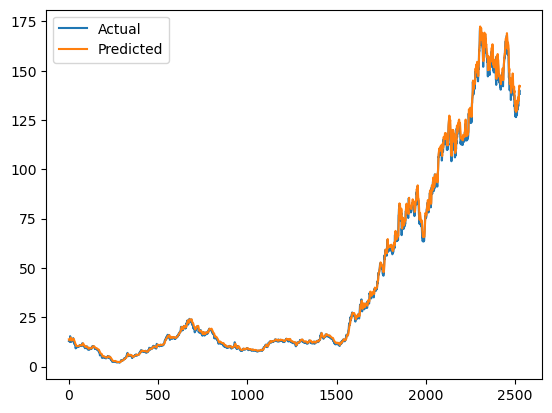

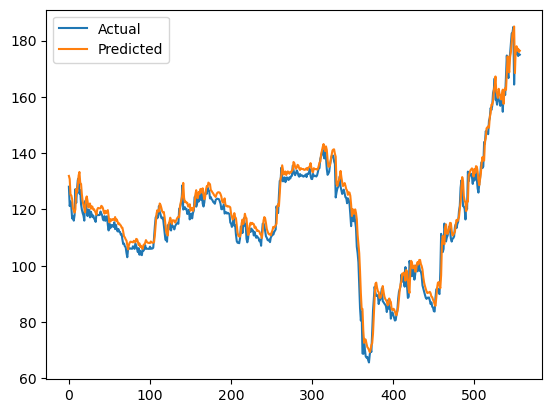

In [6]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(train_Y.flatten(), label='Actual')
plt.plot(train_predict.flatten(), label='Predicted')
plt.legend()
plt.show()

plt.plot(test_Y.flatten(), label='Actual')
plt.plot(test_predict.flatten(), label='Predicted')
plt.legend()
plt.show()

In [7]:
model.save('Bmodel.h5')